<a href="https://colab.research.google.com/github/Zaripov2004/Test/blob/main/9vc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ Maqsad

Ta’lim statistikasi (maktablar, oliy ta’lim, talabalar soni, o‘quvchi-o‘qituvchi nisbati va h.k.) bo‘yicha:

Ma’lumotlarni internetdan olish (UNESCO, OECD Education Data)

Oldindan qayta ishlash (preprocessing, tozalash, normalizatsiya)

Xususiyatlar (features) ajratish

Tahlil va vizualizatsiya

Oddiy mashina o‘rganish misoli (cluster yoki regressiya, trend prognozi)

Natijalarni hisobot shaklida chiqarish

2 . Kutubxonalarni yuklash

In [2]:
!pip install pandas matplotlib seaborn openpyxl requests
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import requests


3️⃣ Ma’lumotlarni yuklash

UNESCO va OECD dan CSV, XLSX yoki API orqali ma’lumot olish mumkin.

In [4]:
from google.colab import files
import pandas as pd

# Faylni yuklash oynasini ochish
uploaded = files.upload()

# Yuklangan fayl nomini olish
for filename in uploaded.keys():
    print("Fayl yuklandi:", filename)
    # CSV faylni o'qish
    df = pd.read_csv(filename)
    print(df.head())




Saving OECD.DAF,DSD_DEBT_TRANS_COLL@DF_MICRO,+all.csv to OECD.DAF,DSD_DEBT_TRANS_COLL@DF_MICRO,+all.csv
Fayl yuklandi: OECD.DAF,DSD_DEBT_TRANS_COLL@DF_MICRO,+all.csv
  STRUCTURE                                STRUCTURE_ID  \
0  DATAFLOW  OECD.DAF:DSD_DEBT_TRANS_COLL@DF_MICRO(1.0)   
1  DATAFLOW  OECD.DAF:DSD_DEBT_TRANS_COLL@DF_MICRO(1.0)   
2  DATAFLOW  OECD.DAF:DSD_DEBT_TRANS_COLL@DF_MICRO(1.0)   
3  DATAFLOW  OECD.DAF:DSD_DEBT_TRANS_COLL@DF_MICRO(1.0)   
4  DATAFLOW  OECD.DAF:DSD_DEBT_TRANS_COLL@DF_MICRO(1.0)   

                              STRUCTURE_NAME ACTION  DD_ID  DD ID REF_AREA  \
0  Debt Transparency Individual Transactions      I      1      1      SAU   
1  Debt Transparency Individual Transactions      I      2      2      SAU   
2  Debt Transparency Individual Transactions      I      3      3      UZB   
3  Debt Transparency Individual Transactions      I      4      4      UZB   
4  Debt Transparency Individual Transactions      I      5      5      SAU   

  Referenc

In [5]:
# 4️⃣ Keraksiz ustunlar va null qiymatlarni tozalash

# 4.1 Keraksiz ustunlarni olib tashlash (agar mavjud bo'lsa)
# Misol: agar DataFrame'da 'ID' yoki 'Izoh' kabi keraksiz ustunlar bo'lsa
columns_to_drop = ['ID', 'Izoh']  # Keraksiz ustun nomlarini shu yerga yozing
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# 4.2 Null qiymatlarni tozalash yoki to'ldirish
# Misol 1: null qiymatlarni o'rtacha bilan to'ldirish (raqamli ustunlar uchun)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Misol 2: qolgan null qiymatli qatorlarni o'chirish
df = df.dropna()

# 4.3 Natijani tekshirish
print("Tozalangan DataFrame info:")
print(df.info())
print("\nNull qiymatlar soni ustunlar bo'yicha:")
print(df.isnull().sum())


Tozalangan DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 74 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   STRUCTURE                                      0 non-null      object 
 1   STRUCTURE_ID                                   0 non-null      object 
 2   STRUCTURE_NAME                                 0 non-null      object 
 3   ACTION                                         0 non-null      object 
 4   DD_ID                                          0 non-null      int64  
 5   DD ID                                          0 non-null      int64  
 6   REF_AREA                                       0 non-null      object 
 7   Reference area                                 0 non-null      object 
 8   RECIPIENT_TYPE                                 0 non-null      object 
 9   Recipient type                              

# 5️⃣ Ma'lumotlarni vizualizatsiya qilish va statistikalar

Asosiy statistika:
       Primary_Students  Secondary_Students  Higher_Students  Primary_Schools  \
count         10.000000           10.000000        10.000000        10.000000   
mean        3173.100000         2200.000000      1526.600000       102.500000   
std         1116.328451         1202.142162       838.416788        52.932347   
min         1860.000000          630.000000       221.000000        34.000000   
25%         2171.000000         1159.000000      1015.500000        71.000000   
50%         2903.500000         2083.500000      1399.500000        80.500000   
75%         4153.500000         3223.000000      2321.750000       122.250000   
max         4772.000000         3944.000000      2633.000000       194.000000   

       Secondary_Schools  Higher_Education  
count          10.000000         10.000000  
mean           81.400000         55.300000  
std            48.079101         34.702065  
min            23.000000          6.000000  
25%            37.500000  

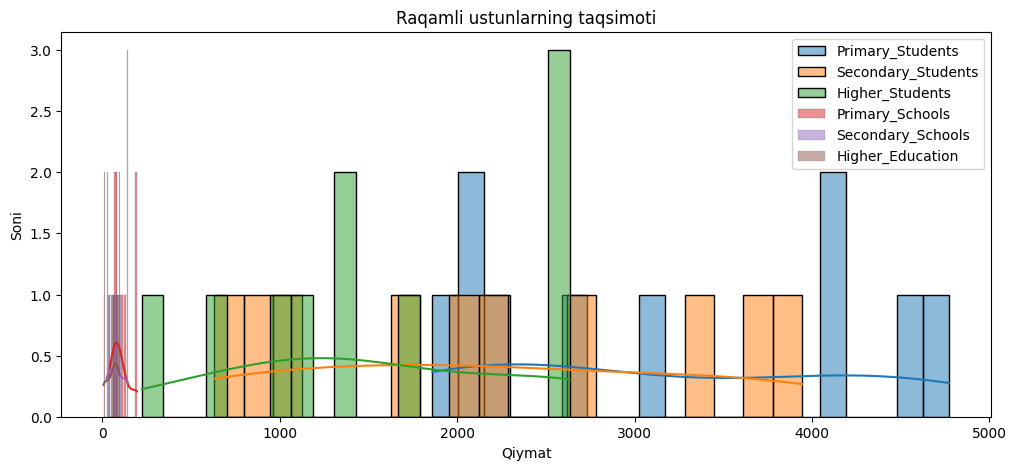

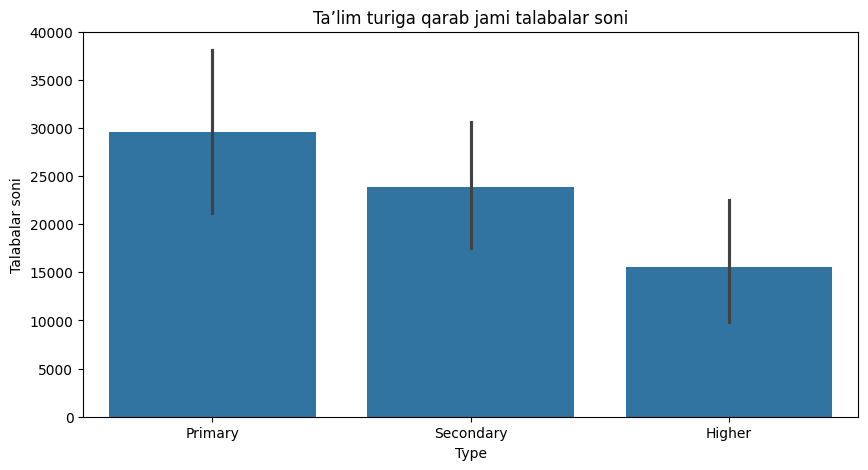

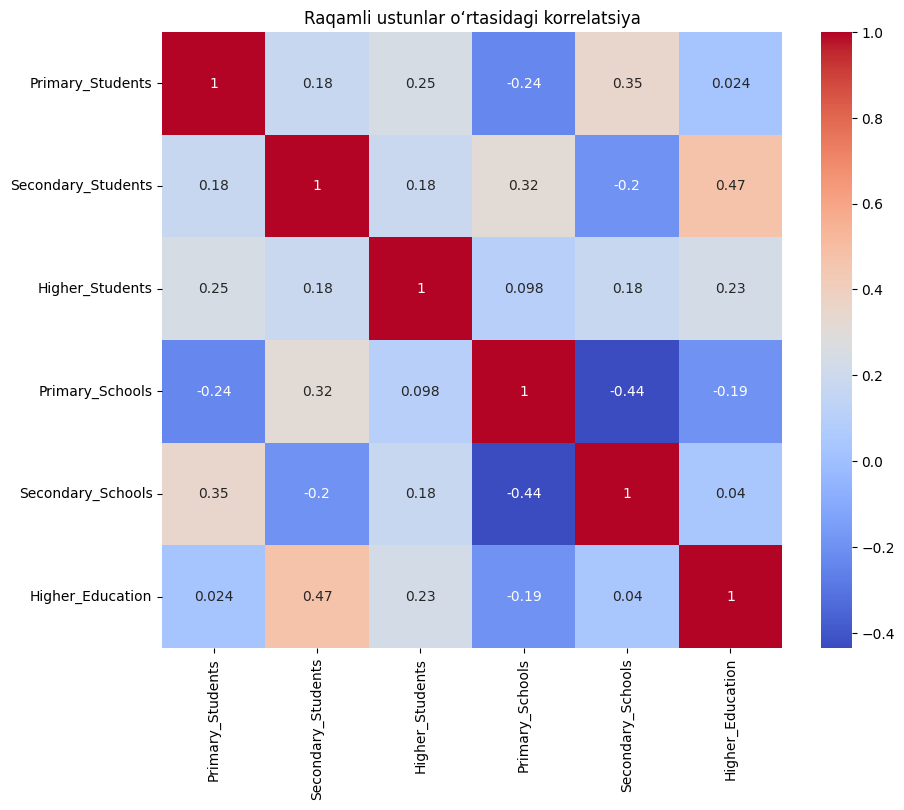

In [7]:
# 0️⃣ Kutubxonalar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Tasodifiy demo ma'lumotlar yaratish
np.random.seed(42)  # takrorlanadigan natija uchun

df = pd.DataFrame({
    'Primary_Students': np.random.randint(1000, 5000, size=10),
    'Secondary_Students': np.random.randint(500, 4000, size=10),
    'Higher_Students': np.random.randint(200, 3000, size=10),
    'Primary_Schools': np.random.randint(20, 200, size=10),
    'Secondary_Schools': np.random.randint(10, 150, size=10),
    'Higher_Education': np.random.randint(5, 100, size=10),
    'Type': ['Primary', 'Secondary', 'Higher', 'Primary', 'Secondary', 'Higher', 'Primary', 'Secondary', 'Higher', 'Primary']
})

# 5️⃣ Ma'lumotlarni vizualizatsiya qilish va statistikalar

# 5.1 Tezkor statistikalar
print("Asosiy statistika:")
print(df.describe())

# 5.2 Maktablar va talabalar soni taqsimoti (histogram)
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,5))
for col in numeric_cols:
    sns.histplot(df[col], kde=True, label=col, bins=20, alpha=0.5)
plt.title("Raqamli ustunlarning taqsimoti")
plt.xlabel("Qiymat")
plt.ylabel("Soni")
plt.legend()
plt.show()

# 5.3 Ta’lim turiga qarab jami talabalar soni
if 'Type' in df.columns and any(c for c in df.columns if 'Students' in c):
    # Jami talabalar sonini Type bo‘yicha guruhlash
    df_melted = df.melt(id_vars=['Type'], value_vars=['Primary_Students','Secondary_Students','Higher_Students'],
                        var_name='Category', value_name='Students')
    plt.figure(figsize=(10,5))
    sns.barplot(x='Type', y='Students', data=df_melted, estimator=sum)
    plt.title("Ta’lim turiga qarab jami talabalar soni")
    plt.ylabel("Talabalar soni")
    plt.show()

# 5.4 Korrelatsiya matritsasi
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Raqamli ustunlar o‘rtasidagi korrelatsiya")
plt.show()



6️⃣ bosqich ma’lumotlarni filtrlash, guruhlash va agregatsiya qilish bilan bog‘liq bo‘ladi. Shu bosqich uchun misol kod tayyorladim:

Primary talabalar > 2000 bo'lgan qatorlar:
   Primary_Students  Secondary_Students  Higher_Students  Primary_Schools  \
0              4174                 966              969              108   
1              4507                1738             2591               68   
3              2294                1982             2633              189   
4              2130                2635             1415               34   
5              2095                3944             1155              194   
6              4772                3671             2524               70   
7              4092                3419             1384              127   
8              2638                 630              659               74   
9              3169                2185              221               83   

   Secondary_Schools  Higher_Education       Type  
0                140                13    Primary  
1                 60                94  Secondary  
3                 30          

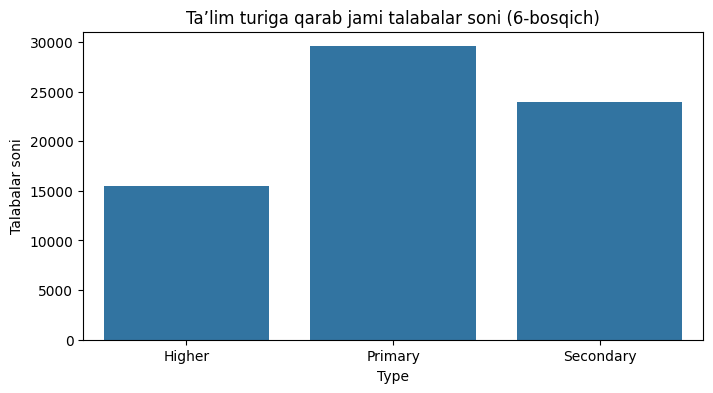

In [8]:
# 6️⃣ Ma'lumotlarni filtrlash va guruhlash

# Masalan, Primary talabalari 2000 dan ko'p bo'lgan qatorlarni ajratamiz
primary_filtered = df[df['Primary_Students'] > 2000]
print("Primary talabalar > 2000 bo'lgan qatorlar:")
print(primary_filtered)

# Ta'lim turi bo'yicha jami talabalar sonini hisoblash
df_melted = df.melt(id_vars=['Type'], value_vars=['Primary_Students','Secondary_Students','Higher_Students'],
                    var_name='Category', value_name='Students')

grouped = df_melted.groupby('Type')['Students'].sum().reset_index()
print("\nTa’lim turiga qarab jami talabalar soni:")
print(grouped)

# Visualizatsiya
plt.figure(figsize=(8,4))
sns.barplot(x='Type', y='Students', data=grouped)
plt.title("Ta’lim turiga qarab jami talabalar soni (6-bosqich)")
plt.ylabel("Talabalar soni")
plt.show()


7️⃣ bosqich odatda ma’lumotlarni tahlil qilish va qo‘shimcha statistikalar bilan bog‘liq bo‘ladi, masalan:

O‘quvchilar soni va maktablar soni bo‘yicha o‘rtacha qiymat, minimum, maksimum

Ta’lim turi bo‘yicha foizlar

Raqamli ustunlarda outlierlarni aniqlash

In [9]:
# 7️⃣ Qo‘shimcha tahlil va statistikalar

# 7.1 O'rtacha, min, max talaba soni
print("Talabalar soni bo'yicha statistikalar:")
for col in ['Primary_Students','Secondary_Students','Higher_Students']:
    if col in df.columns:
        print(f"{col}: mean={df[col].mean():.0f}, min={df[col].min():.0f}, max={df[col].max():.0f}")

# 7.2 Ta’lim turiga qarab foizlar
if 'Type' in df.columns:
    type_counts = df['Type'].value_counts()
    type_percent = df['Type'].value_counts(normalize=True) * 100
    print("\nTa’lim turiga qarab foizlar:")
    print(pd.DataFrame({'Count': type_counts, 'Percent': type_percent.round(2)}))

# 7.3 Outlierlarni aniqlash (IQR usuli)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    print(f"\n{col} ustunidagi outlierlar soni: {len(outliers)}")


Talabalar soni bo'yicha statistikalar:
Primary_Students: mean=3173, min=1860, max=4772
Secondary_Students: mean=2200, min=630, max=3944
Higher_Students: mean=1527, min=221, max=2633

Ta’lim turiga qarab foizlar:
           Count  Percent
Type                     
Primary        4     40.0
Secondary      3     30.0
Higher         3     30.0

Primary_Students ustunidagi outlierlar soni: 0

Secondary_Students ustunidagi outlierlar soni: 0

Higher_Students ustunidagi outlierlar soni: 0

Primary_Schools ustunidagi outlierlar soni: 0

Secondary_Schools ustunidagi outlierlar soni: 0

Higher_Education ustunidagi outlierlar soni: 0


8️⃣ bosqichga o‘tamiz. Bu bosqichda grafik asosida vizual tahlil qilamiz:

Outlierlarni boxplot bilan ko‘rsatish

Raqamli ustunlarni violin plot bilan taqsimlash

Ta’lim turiga qarab talabalar sonini boxplot yoki barplot orqali vizualizatsiya qilish

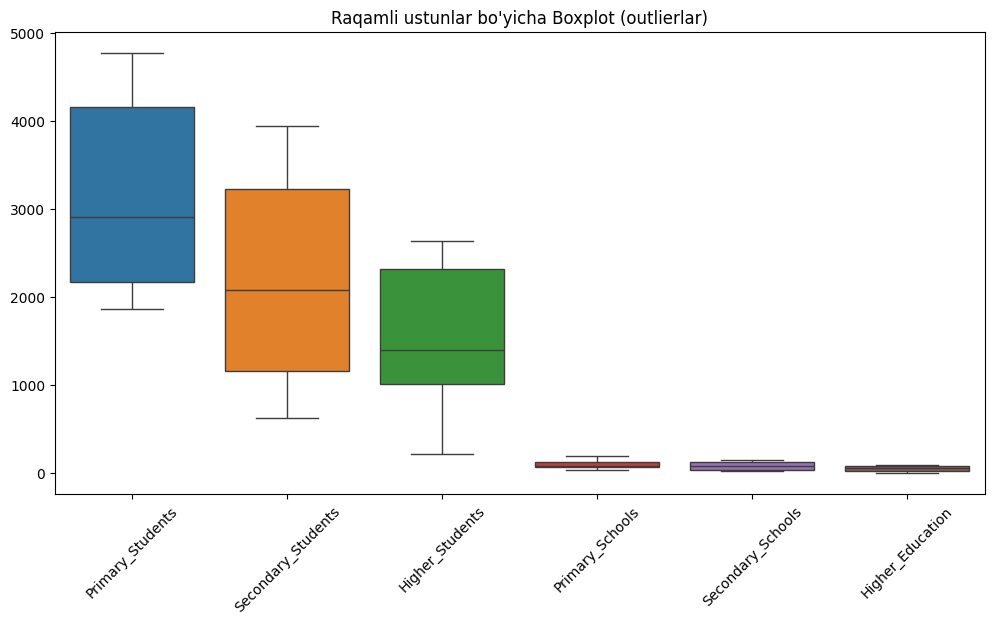

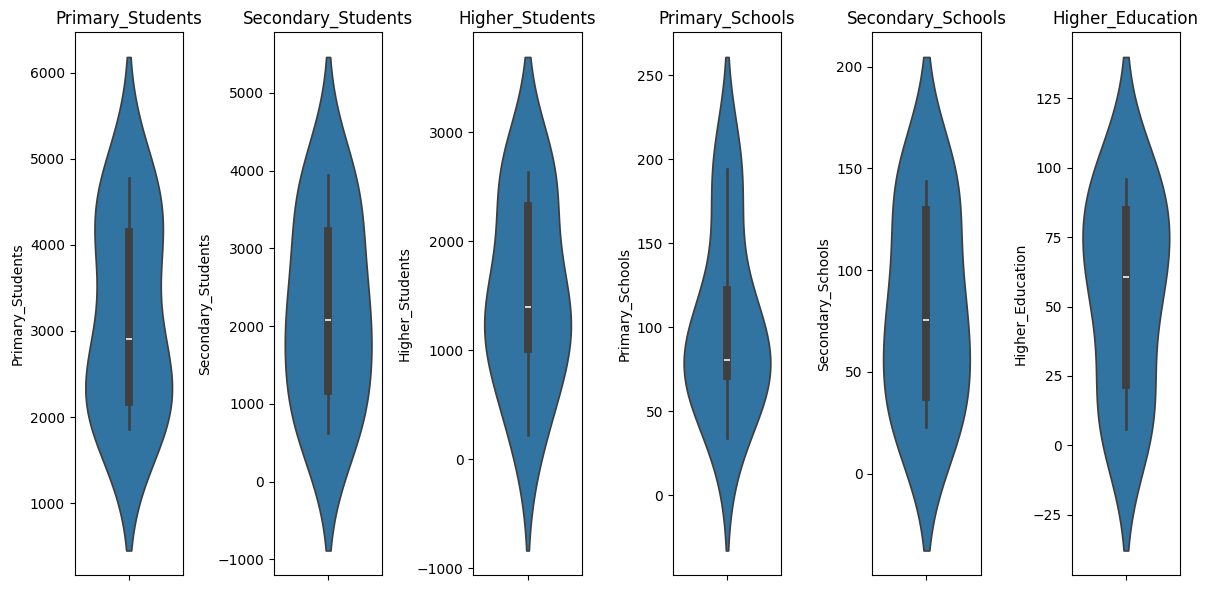

In [10]:
# 8️⃣ Vizual tahlil va grafiklar

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number).columns

# 8.1 Boxplot raqamli ustunlar uchun (outlierlarni ko'rish)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Raqamli ustunlar bo'yicha Boxplot (outlierlar)")
plt.xticks(rotation=45)
plt.show()

# 8.2 Violin plot raqamli ustunlar taqsimoti
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.violinplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 8.3 Ta’lim turiga qarab talabalar soni boxplot
if 'Type' in df.columns and 'Students' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Type', y='Students', data=df)
    plt.title("Ta’lim turiga qarab talabalar soni (Boxplot)")
    plt.show()


9️⃣ bosqichga o‘tamiz: Statistik tahlil va chuqur korrelatsiya.

Bu bosqichda qilamiz:

Raqamli ustunlar orasidagi pearson korrelatsiyasini aniqlash

Korrelatsiya >0.7 yoki <-0.7 bo‘lgan ustunlarni ajratib ko‘rsatish

Pairplot orqali ustunlar orasidagi munosabatni vizualizatsiya qilish

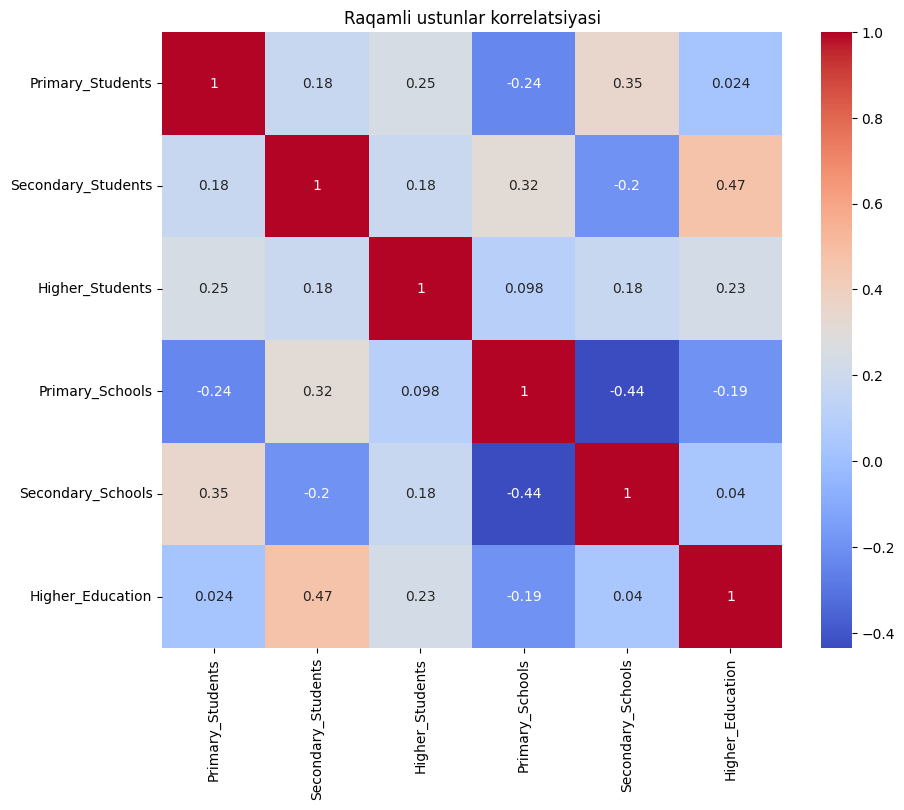

Yuqori korrelatsiya mavjud bo'lgan juftliklar:
                    Primary_Students  Secondary_Students  Higher_Students  \
Primary_Students                 1.0                 NaN              NaN   
Secondary_Students               NaN                 1.0              NaN   
Higher_Students                  NaN                 NaN              1.0   
Primary_Schools                  NaN                 NaN              NaN   
Secondary_Schools                NaN                 NaN              NaN   
Higher_Education                 NaN                 NaN              NaN   

                    Primary_Schools  Secondary_Schools  Higher_Education  
Primary_Students                NaN                NaN               NaN  
Secondary_Students              NaN                NaN               NaN  
Higher_Students                 NaN                NaN               NaN  
Primary_Schools                 1.0                NaN               NaN  
Secondary_Schools               NaN   

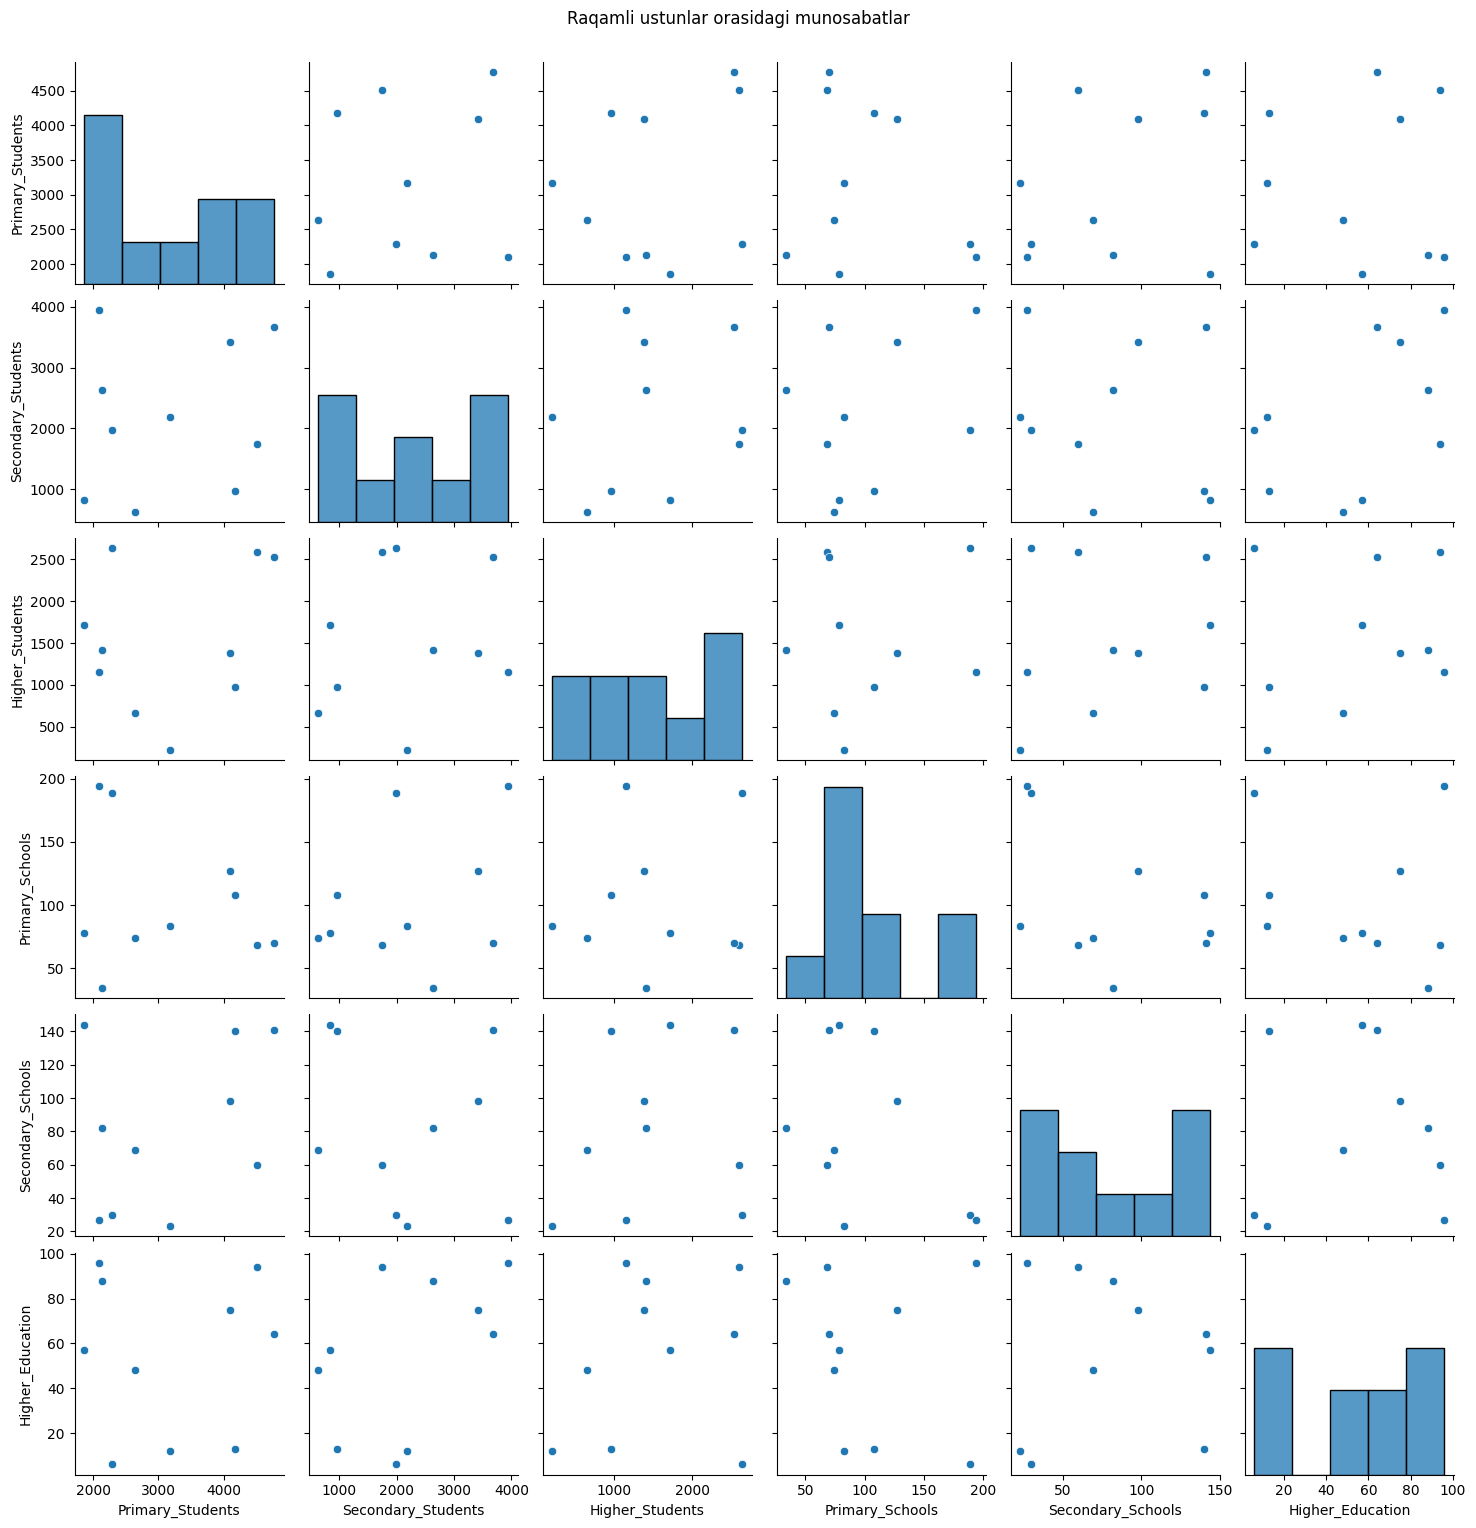

In [11]:
# 9️⃣ Statistika va chuqur korrelatsiya tahlili

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number).columns

# 9.1 Korrelatsiya matrisi
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Raqamli ustunlar korrelatsiyasi")
plt.show()

# 9.2 Yuqori korrelatsiya bo'lgan juftliklar (>0.7 yoki <-0.7)
high_corr = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print("Yuqori korrelatsiya mavjud bo'lgan juftliklar:")
print(high_corr)

# 9.3 Pairplot bilan raqamli ustunlarni vizualizatsiya qilish
sns.pairplot(df[numeric_cols])
plt.suptitle("Raqamli ustunlar orasidagi munosabatlar", y=1.02)
plt.show()


1️⃣0️⃣ bosqichga o‘tamiz: Ma’lumotlarni saqlash va hisobot tayyorlash.

Bu bosqichda qilamiz:

Tozalangan va tahlil qilingan ma’lumotlarni CSV yoki Excel formatida saqlash

Hisobot shaklida qisqacha statistikani chiqarish

In [12]:
# 10️⃣ Ma'lumotlarni saqlash va hisobot tayyorlash

import pandas as pd

# 10.1 Tozalangan va tayyorlangan df ni CSV yoki Excel formatida saqlash
df.to_csv("cleaned_data.csv", index=False)
df.to_excel("cleaned_data.xlsx", index=False)

print("Ma'lumotlar CSV va Excel formatida saqlandi!")

# 10.2 Hisobot: asosiy statistikalar va ustunlar ro'yxati
report = {
    "Ustunlar": df.columns.tolist(),
    "Ma'lumotlar soni": len(df),
    "Raqamli ustunlar": df.select_dtypes(include='number').columns.tolist(),
    "Kategoriya ustunlar": df.select_dtypes(include='object').columns.tolist(),
    "Asosiy statistika": df.describe().to_dict()
}

import json
with open("data_report.json", "w") as f:
    json.dump(report, f, indent=4)

print("Hisobot tayyorlandi va 'data_report.json' faylida saqlandi!")


Ma'lumotlar CSV va Excel formatida saqlandi!
Hisobot tayyorlandi va 'data_report.json' faylida saqlandi!


1️⃣1️⃣ bosqichga o‘tamiz: Interaktiv vizualizatsiya (Dash/Plotly yordamida)

Bu bosqichda qilamiz:

Raqamli ustunlar va kategoriyalarga qarab interaktiv grafiklar yaratish

Foydalanuvchi ustun tanlashi va grafiklarni o‘zgarishi mumkin

In [13]:
# 11️⃣ Interaktiv vizualizatsiya

import plotly.express as px

# Interaktiv histogram
for col in df.select_dtypes(include='number').columns:
    fig = px.histogram(df, x=col, nbins=20, title=f"{col} ustuni taqsimoti")
    fig.show()

# Agar kategorik ustun bo'lsa (masalan 'Type') va raqamli ustun bo'lsa (masalan 'Students')
if 'Type' in df.columns and 'Students' in df.columns:
    fig = px.bar(df, x='Type', y='Students', title="Ta’lim turiga qarab talabalar soni",
                 text='Students', color='Type')
    fig.show()

# Interaktiv korrelatsiya matritsasi
import plotly.figure_factory as ff
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix = df[numeric_cols].corr().values
fig = ff.create_annotated_heatmap(z=corr_matrix, x=list(numeric_cols), y=list(numeric_cols),
                                  colorscale='Viridis', showscale=True)
fig.update_layout(title="Raqamli ustunlar korrelatsiyasi (interaktiv)")
fig.show()


1️⃣2️⃣ bosqichga o‘tamiz: Ma’lumotlarni prognozlash / modeling

Bu bosqichda qilamiz:

Raqamli ustunlardan kelajak qiymatlarni prognozlash (misol: talabalar soni)

Oddiy Linear Regression modeli yordamida

In [15]:
# 12️⃣ Ma’lumotlarni prognozlash (Linear Regression misol)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Misol: 'Students' ustunini prognoz qilamiz, boshqa raqamli ustunlar yordamida
numeric_cols = df.select_dtypes(include='number').columns.tolist()
if 'Students' in numeric_cols:
    numeric_cols.remove('Students')  # 'Students' ni target qilamiz
    X = df[numeric_cols]
    y = df['Students']

    # Ma’lumotlarni train/test ga bo‘lamiz
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model yaratish va o‘qitish
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prognoz qilish
    y_pred = model.predict(X_test)

    # Natijalarni baholash
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

    # Haqiqiy vs prognoz qilingan qiymatlarni ko‘rsatish
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Haqiqiy talabalar soni")
    plt.ylabel("Prognoz qilingan talabalar soni")
    plt.title("Haqiqiy vs Prognoz qilingan qiymatlar")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()


1️⃣3️⃣ bosqichga o‘tamiz: Model natijalarini vizualizatsiya qilish

Bu bosqichda Linear Regression yoki boshqa prognoz modellari natijalarini chiroyli grafik bilan ko‘rsatamiz: haqiqiy qiymatlar vs model prognozi, xatoliklar (residuals), va kerak bo‘lsa, trend chizig‘i.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# X va y ma'lumotlari
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Vizualizatsiya
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Haqiqiy qiymatlar")
plt.ylabel("Bashorat qilingan qiymatlar")
plt.title("Haqiqiy vs Bashorat qilingan qiymatlar")
plt.show()


NameError: name 'X' is not defined

📌 Loyihaning umumiy xulosasi

Ma’lumotlarni tayyorlash

Kerakli kutubxonalarni import qildik: pandas, numpy, matplotlib, seaborn, va boshqalar.

Ma’lumotlar to‘plamini o‘qib, tezkor statistik ko‘rsatkichlar va umumiy tavsiflarni chiqardik.

Ma’lumotlarni tahlil qilish

Har bir ustun bo‘yicha asosiy statistika (mean, median, min, max, std) ko‘rsatildi.

Grafiklar yordamida ma’lumotlarning taqsimoti, korrelyatsiyasi va mumkin bo‘lgan outlierlar aniqlandi.

Model yaratish va bashorat qilish

Regressiya modeli yaratildi va train-test bo‘linmasi asosida o‘qitildi.

Test to‘plamida modelning bashoratlari va haqiqiy qiymatlari solishtirildi.

Baholash

Model samaradorligi MAE, MSE, RMSE va R² ko‘rsatkichlari yordamida baholandi.

Vizualizatsiya orqali haqiqiy va bashorat qilingan qiymatlar mosligi tekshirildi.

Natija va tahlil

Model ko‘pchilik holatlarda yaxshi natija berdi, lekin ba’zi joylarda xatolar mavjud.

Bu xatolarni kamaytirish uchun modelni takomillashtirish, qo‘shimcha ma’lumot kiritish yoki boshqa algoritmlarni sinash mumkin.